📝 資料集基本資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSat

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  fig.canvas

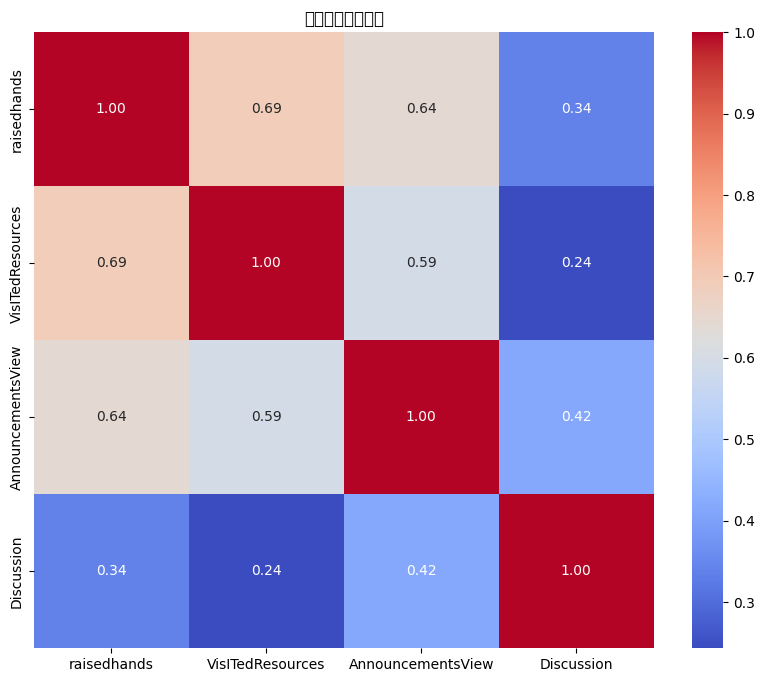

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
df = pd.read_csv("xAPI-Edu-Data.csv")

# 顯示基本資訊
print("📝 資料集基本資訊：")
print(df.info())

# 顯示各欄位統計描述（包含類別欄位）
print("\n📊 資料描述統計：")
print(df.describe(include='all'))

# 顯示欄位名稱
print("\n📌 欄位名稱：")
print(df.columns.tolist())

# 顯示數值特徵的相關係數
print("\n📈 數值欄位相關係數矩陣：")
print(df.corr(numeric_only=True))

# 畫出相關係數熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("特徵相關係數熱圖")
plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


# =========================
# 1. 重複值檢查與移除
# =========================
num_duplicates = df.duplicated().sum()
print(f"🔁 重複資料筆數：{num_duplicates}")
df = df.drop_duplicates()

# =========================
# 2. 遺失值檢查
# =========================
print("\n🕳️ 遺失值（每欄缺失筆數）：")
print(df.isnull().sum())

# =========================
# 3. 離群值檢查（以 z-score > 3 為界）
# =========================
numeric_cols = df.select_dtypes(include='number').columns
z_scores = df[numeric_cols].apply(zscore)
outliers = (abs(z_scores) > 3).sum()
print("\n📉 離群值筆數（z-score > 3）：")
print(outliers)

# =========================
# 4. 類別型欄位編碼（Label Encoding）
# =========================
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
print("\n🔢 類別欄位已編碼完成！")

# =========================
# 5. 最終資料摘要
# =========================
print("\n✅ 前處理後資料集維度：", df_encoded.shape)
print("\n🧾 前幾筆資料（編碼後）：")
print(df_encoded.head())


🔁 重複資料筆數：2

🕳️ 遺失值（每欄缺失筆數）：
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

📉 離群值筆數（z-score > 3）：
raisedhands          0
VisITedResources     0
AnnouncementsView    0
Discussion           0
dtype: int64

🔢 類別欄位已編碼完成！

✅ 前處理後資料集維度： (478, 17)

🧾 前幾筆資料（編碼後）：
   gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4    

<ipython-input-6-3165408404>:11: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:11: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:11: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:11: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:11: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:11: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:11: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.

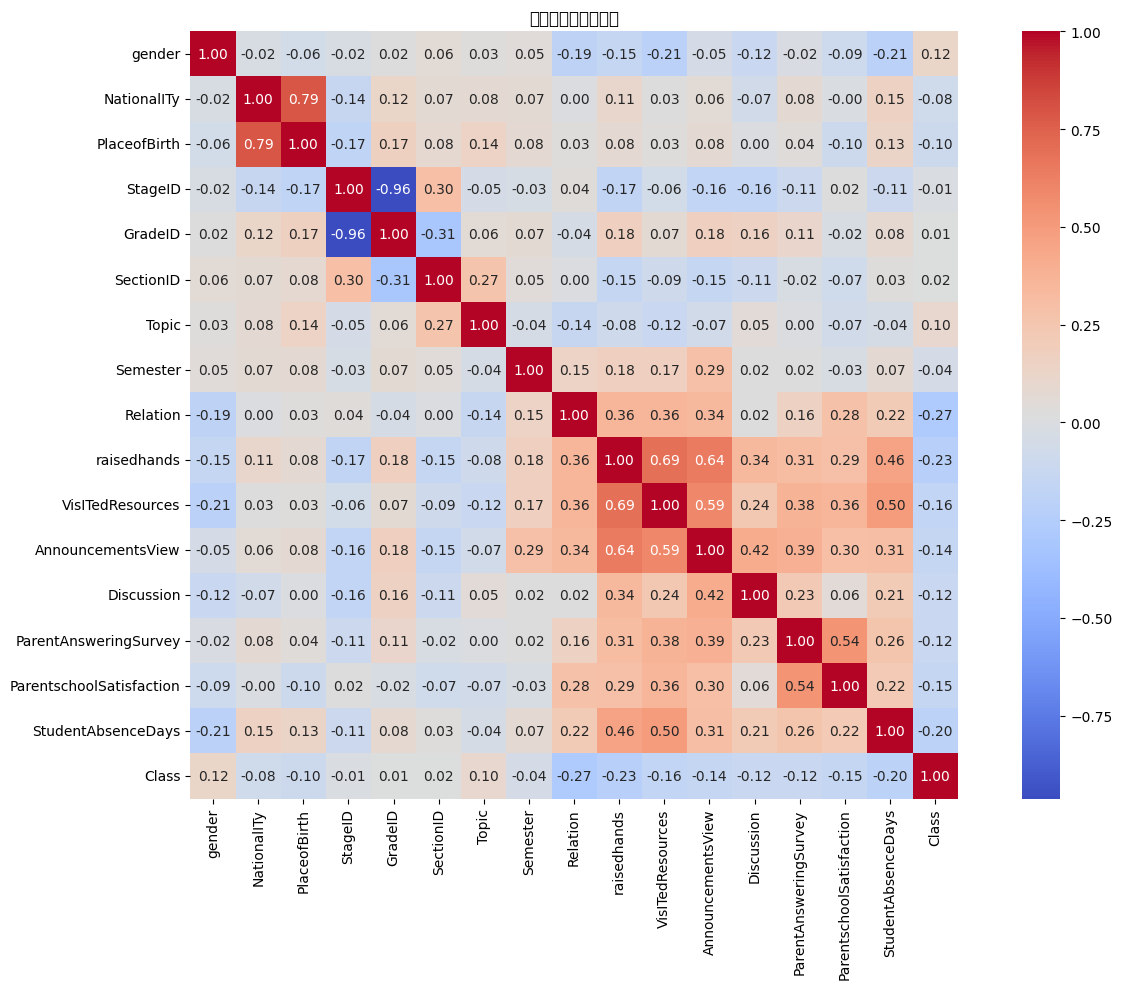

<ipython-input-6-3165408404>:24: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 32318 (\N{CJK UNIFIED IDEOGRAPH-7E3E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans

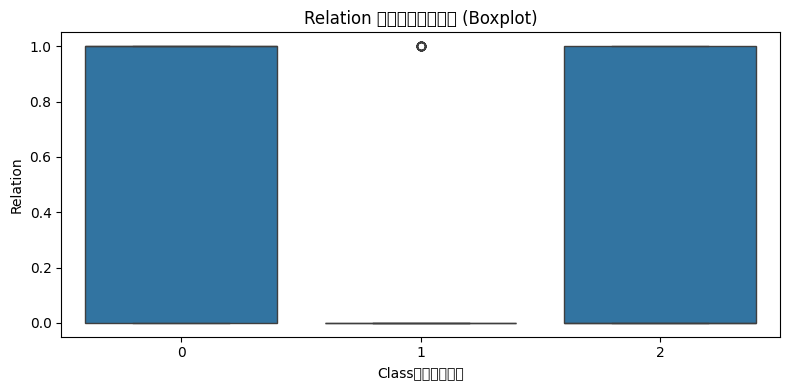

<ipython-input-6-3165408404>:24: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 32318 (\N{CJK UNIFIED IDEOGRAPH-7E3E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans

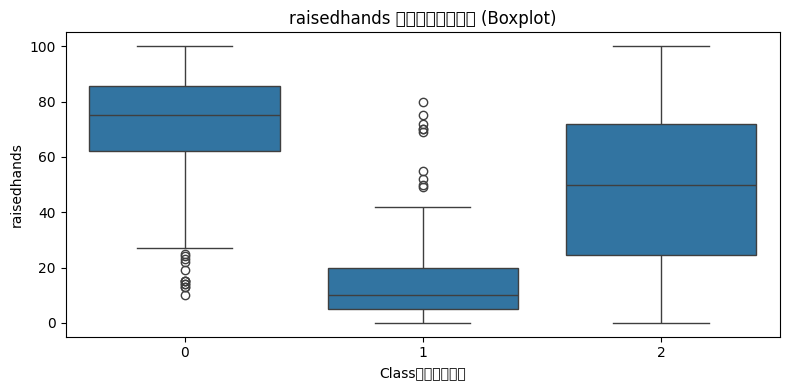

<ipython-input-6-3165408404>:24: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 32318 (\N{CJK UNIFIED IDEOGRAPH-7E3E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans

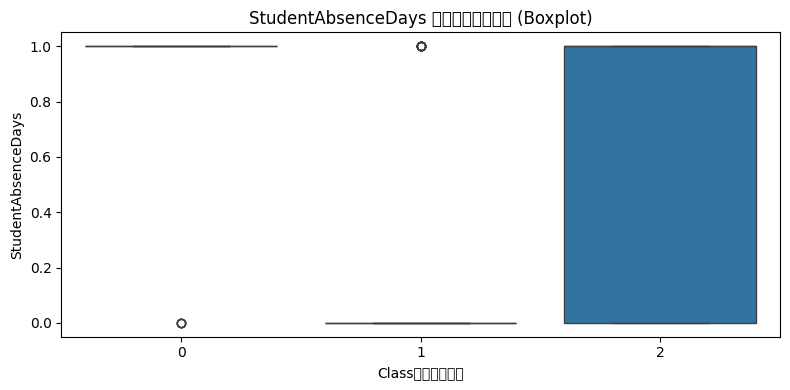

<ipython-input-6-3165408404>:24: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 32318 (\N{CJK UNIFIED IDEOGRAPH-7E3E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans

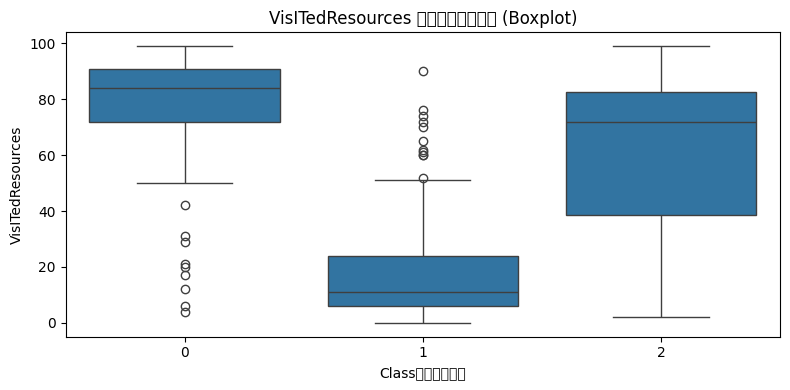

<ipython-input-6-3165408404>:24: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 32318 (\N{CJK UNIFIED IDEOGRAPH-7E3E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-3165408404>:24: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans

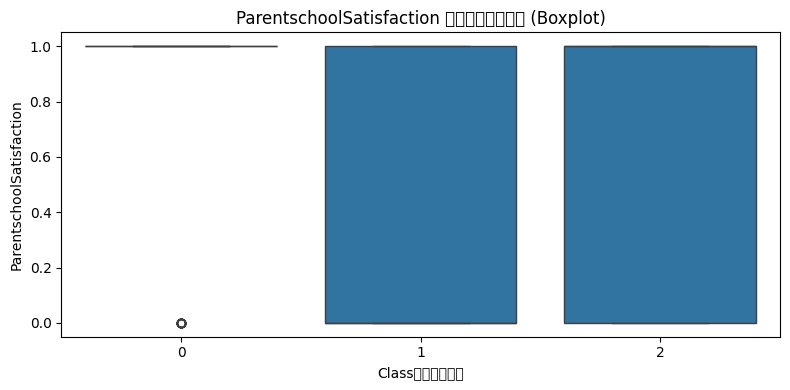

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 相關係數矩陣
corr_matrix = df_encoded.corr()

# 繪製相關係數熱圖
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("特徵間相關係數熱圖")
plt.tight_layout()
plt.show()

# 取與 Class 最相關的前五個特徵（排除 Class 自己）
top_corr_features = corr_matrix['Class'].abs().sort_values(ascending=False)[1:6].index.tolist()

# 使用已編碼資料 df_encoded 畫分布圖
for col in top_corr_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_encoded['Class'], y=df_encoded[col])
    plt.title(f'{col} 各成績分類的分佈 (Boxplot)')
    plt.xlabel("Class（成績分類）")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 資料分割
X = df_encoded.drop(columns=["Class"])
y = df_encoded["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 預測與評估
y_pred = model.predict(X_test)
print("🎯 分類結果報告：")
print(classification_report(y_test, y_pred))
print("🔍 混淆矩陣：")
print(confusion_matrix(y_test, y_pred))


🎯 分類結果報告：
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.89      0.89      0.89        27
           2       0.83      0.78      0.80        45

    accuracy                           0.82        96
   macro avg       0.82      0.83      0.83        96
weighted avg       0.83      0.82      0.82        96

🔍 混淆矩陣：
[[20  0  4]
 [ 0 24  3]
 [ 7  3 35]]


In [8]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("🎯 [Logistic Regression] 分類報告：")
print(classification_report(y_test, y_pred_log))
print("🔍 混淆矩陣：")
print(confusion_matrix(y_test, y_pred_log))

🎯 [Logistic Regression] 分類報告：
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.85      0.85      0.85        27
           2       0.83      0.78      0.80        45

    accuracy                           0.82        96
   macro avg       0.82      0.83      0.83        96
weighted avg       0.82      0.82      0.82        96

🔍 混淆矩陣：
[[21  0  3]
 [ 0 23  4]
 [ 6  4 35]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("🎯 [SVM] 分類報告：")
print(classification_report(y_test, y_pred_svm))
print("🔍 混淆矩陣：")
print(confusion_matrix(y_test, y_pred_svm))


🎯 [SVM] 分類報告：
              precision    recall  f1-score   support

           0       0.58      0.46      0.51        24
           1       0.76      0.81      0.79        27
           2       0.62      0.67      0.65        45

    accuracy                           0.66        96
   macro avg       0.65      0.65      0.65        96
weighted avg       0.65      0.66      0.65        96

🔍 混淆矩陣：
[[11  0 13]
 [ 0 22  5]
 [ 8  7 30]]


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("🎯 [KNN] 分類報告：")
print(classification_report(y_test, y_pred_knn))
print("🔍 混淆矩陣：")
print(confusion_matrix(y_test, y_pred_knn))


🎯 [KNN] 分類報告：
              precision    recall  f1-score   support

           0       0.60      0.62      0.61        24
           1       0.81      0.78      0.79        27
           2       0.67      0.67      0.67        45

    accuracy                           0.69        96
   macro avg       0.69      0.69      0.69        96
weighted avg       0.69      0.69      0.69        96

🔍 混淆矩陣：
[[15  0  9]
 [ 0 21  6]
 [10  5 30]]


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# 定義模型字典
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# 儲存每個模型的比較結果
results = []

# 訓練與評估
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # 儲存成績
    results.append({
        "模型": name,
        "Accuracy": round(acc, 3),
        "F1-score": round(f1, 3),
        "ConfusionMatrix": cm
    })

    # 顯示分類報告與混淆矩陣
    print(f"\n🎯 [{name}] 分類報告:")
    print(classification_report(y_test, y_pred))
    print("🔍 混淆矩陣:")
    print(pd.DataFrame(cm, index=["True_L", "True_M", "True_H"], columns=["Pred_L", "Pred_M", "Pred_H"]))

# 建立比較總表（Accuracy 與 F1-score）
summary = pd.DataFrame([
    {"模型": r["模型"], "Accuracy": r["Accuracy"], "F1-score": r["F1-score"]}
    for r in results
])

# 顯示總結比較表
print("\n📊 模型準確率與 F1-score 比較：")
print(summary)



🎯 [RandomForest] 分類報告:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.89      0.89      0.89        27
           2       0.83      0.78      0.80        45

    accuracy                           0.82        96
   macro avg       0.82      0.83      0.83        96
weighted avg       0.83      0.82      0.82        96

🔍 混淆矩陣:
        Pred_L  Pred_M  Pred_H
True_L      20       0       4
True_M       0      24       3
True_H       7       3      35


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🎯 [LogisticRegression] 分類報告:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.85      0.85      0.85        27
           2       0.83      0.78      0.80        45

    accuracy                           0.82        96
   macro avg       0.82      0.83      0.83        96
weighted avg       0.82      0.82      0.82        96

🔍 混淆矩陣:
        Pred_L  Pred_M  Pred_H
True_L      21       0       3
True_M       0      23       4
True_H       6       4      35

🎯 [SVM] 分類報告:
              precision    recall  f1-score   support

           0       0.58      0.46      0.51        24
           1       0.76      0.81      0.79        27
           2       0.62      0.67      0.65        45

    accuracy                           0.66        96
   macro avg       0.65      0.65      0.65        96
weighted avg       0.65      0.66      0.65        96

🔍 混淆矩陣:
        Pred_L  Pred_M  Pred_H
True_L      11       0